In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# KNN

## Titanic
Vamos a crear un modelo que prediga la probabilidad de supervivencia de los pasajeros

https://www.kaggle.com/c/titanic/data?select=train.csv

0. Importar data de training y testing. Agregarle a la tabla de testing la columna survived proveniente de la tabla gender_submission

In [7]:
training = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")

In [10]:
testing = testing.merge(gender, on='PassengerId')

In [13]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


1. Buscar columnas con valores nulos y cantidad de nulos en cada una. Fijarse el porcentaje de los datos nulos que representan sobre el total.

In [16]:
nulos_training = training.isnull().sum()
nulos_training/ len(training) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [19]:
nulos_testing = testing.isnull().sum()
nulos_testing / len(testing) *100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
Survived        0.000000
dtype: float64

2. En base al resultado anterior. ¿Cúales columnas consideran que tienen sentido completar y cuales se deberían eliminar? Eliminar la que corresponda de la tabla de test y de train.

In [22]:
training.drop(columns=['Cabin'], inplace=True)
testing.drop(columns=['Cabin'], inplace=True)

In [26]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


3. Completar valores nulos con el criterio que considres correcto en cada una de las columnas (que tengan sentido completar). Esto debe hacerse tanto en la tabla de training como la de testing (con el mismo criterio en ambas).

   Verificar como se distribuyen los valores de cada columna con un gráfico previamente para tener más herramientas en la decisión

<Axes: xlabel='Age', ylabel='Count'>

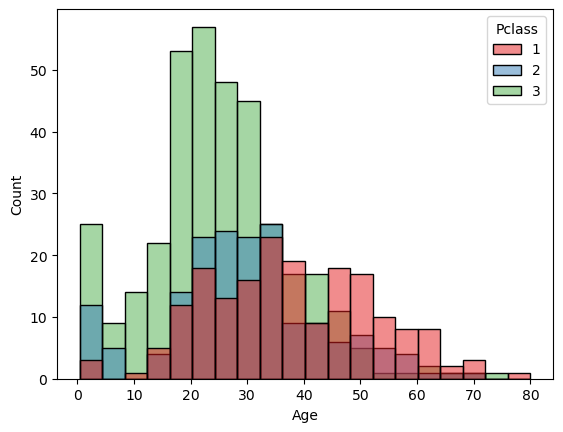

In [30]:
sns.histplot(
    data = training,
    x = "Age",
    hue = "Pclass",
    palette="Set1"
)

In [34]:
mediana_edad = testing.groupby(['Pclass', 'Sex'])['Age'].median()
mediana_edad

Pclass  Sex   
1       female    41.0
        male      42.0
2       female    24.0
        male      28.0
3       female    22.0
        male      24.0
Name: Age, dtype: float64

In [37]:
M1 = (testing.Sex == "male") & (testing.Pclass == 1)
F1 = (testing.Sex == "female") & (testing.Pclass == 1)
M2 = (testing.Sex == "male") & (testing.Pclass == 2)
F2 = (testing.Sex == "female") & (testing.Pclass == 2)
M3 = (testing.Sex == "male") & (testing.Pclass == 3)
F3 = (testing.Sex == "female") & (testing.Pclass == 3)

In [40]:
testing.loc[M1, "Age"] = testing.loc[M1,"Age"].fillna(mediana_edad.iloc[1])
testing.loc[F1, "Age"] = testing.loc[F1,"Age"].fillna(mediana_edad.iloc[0])
testing.loc[M2, "Age"] = testing.loc[M2,"Age"].fillna(mediana_edad.iloc[3])
testing.loc[F2, "Age"] = testing.loc[F2,"Age"].fillna(mediana_edad.iloc[2])
testing.loc[M3, "Age"] = testing.loc[M3,"Age"].fillna(mediana_edad.iloc[5])
testing.loc[F3, "Age"] = testing.loc[F3,"Age"].fillna(mediana_edad.iloc[4])

In [43]:
testing.Age.isnull().sum()

0

In [46]:
mediana_training = training.groupby(['Pclass', 'Sex'])['Age'].median()
mediana_training

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [49]:
TM1 = (training.Sex == "male") & (training.Pclass == 1)
TF1 = (training.Sex == "female") & (training.Pclass == 1)
TM2 = (training.Sex == "male") & (training.Pclass == 2)
TF2 = (training.Sex == "female") & (training.Pclass == 2)
TM3 = (training.Sex == "male") & (training.Pclass == 3)
TF3 = (training.Sex == "female") & (training.Pclass == 3)

In [52]:
training.loc[TM1, "Age"] = training.loc[TM1,"Age"].fillna(mediana_training.iloc[1])
training.loc[TF1, "Age"] = training.loc[TF1,"Age"].fillna(mediana_training.iloc[0])
training.loc[TM2, "Age"] = training.loc[TM2,"Age"].fillna(mediana_training.iloc[3])
training.loc[TF2, "Age"] = training.loc[TF2,"Age"].fillna(mediana_training.iloc[2])
training.loc[TM3, "Age"] = training.loc[TM3,"Age"].fillna(mediana_training.iloc[5])
training.loc[TF3, "Age"] = training.loc[TF3,"Age"].fillna(mediana_training.iloc[4])

In [55]:
training.Age.isnull().sum()

0

<Axes: xlabel='Fare', ylabel='Count'>

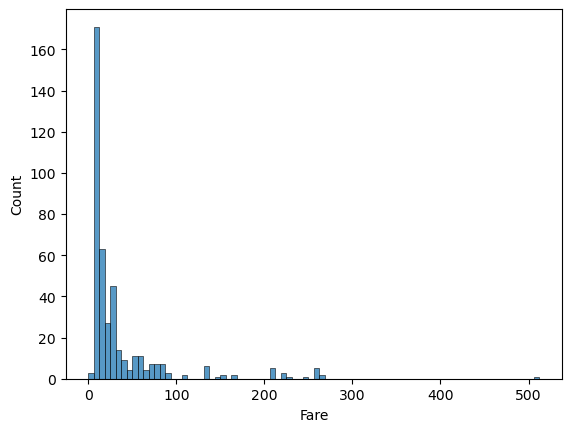

In [58]:
sns.histplot(
    data = testing,
    x = "Fare",
    #hue = "Pclass",
    #palette="Set1"
)

In [195]:
testing.Fare.isnull().sum()

0

In [65]:
testing.fillna(value = testing.Fare.median(), inplace = True)

<Axes: xlabel='Embarked', ylabel='Count'>

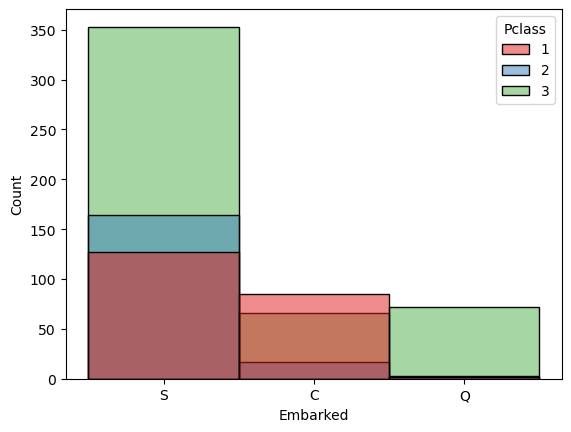

In [68]:
sns.histplot(
    data = training,
    x = "Embarked",
    hue = "Pclass",
    palette="Set1"
)

In [197]:
training.Embarked.isnull().sum()

AttributeError: 'DataFrame' object has no attribute 'Embarked'

In [79]:
training.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [82]:
training["Embarked"].fillna(
    value = training.Embarked.mode()[0],
    inplace= True
)

In [85]:
testing.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [89]:
training.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

4. Realizar análisis exploratorio. Graficar las personas que sobrevivieron por:
    - Clase (Pclass)
    - Sexo (Sex)
    - Costo de boleto (Fare)

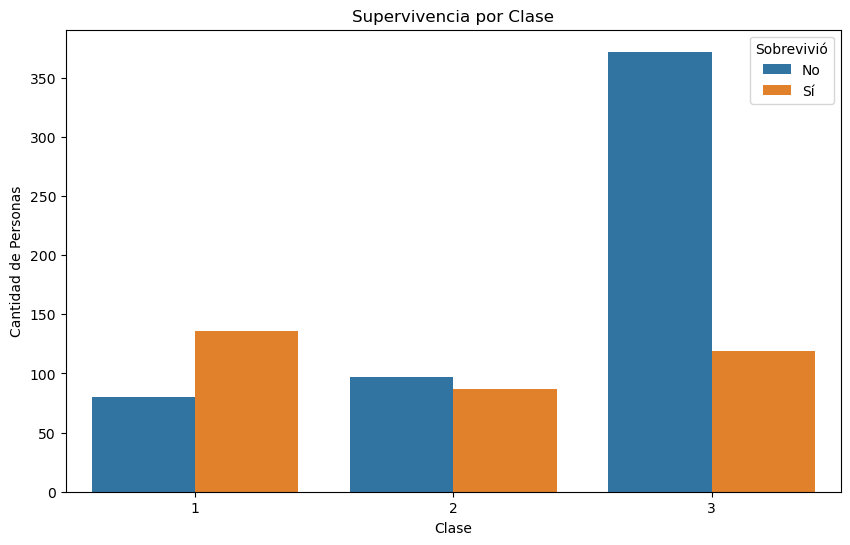

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(data=training, x='Pclass', hue='Survived')
plt.title('Supervivencia por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Personas')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()

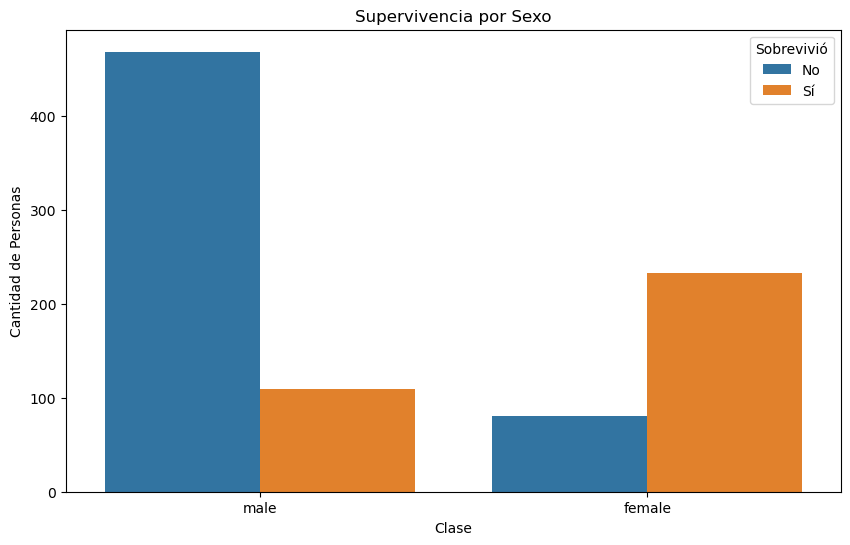

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(data=training, x='Sex', hue='Survived')
plt.title('Supervivencia por Sexo')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Personas')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()

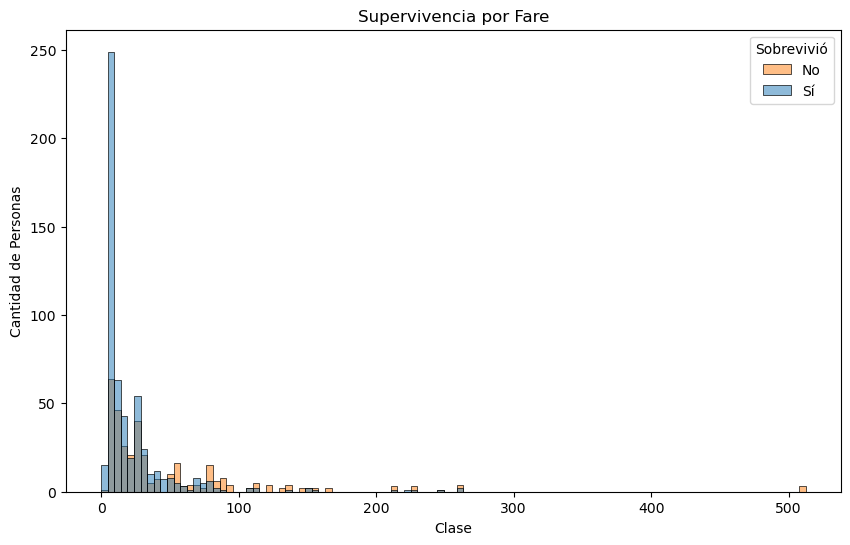

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(data=training, x='Fare', hue='Survived')
plt.title('Supervivencia por Fare')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Personas')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()

5. Verificar columnas del DataFrame e identificar sobre cuales se deberían generar variables dummies.
   Generar columnas de dummies sobre "Pclass","Embarked" y "Sex". Aplicar cambios en training y testing

In [102]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [105]:
testing = pd.get_dummies(
    testing,
    columns = ["Pclass", "Embarked", "Sex"],
    drop_first = True
)
training = pd.get_dummies(
    training,
    columns = ["Pclass", "Embarked", "Sex"],
    drop_first = True
)

6. Eliminar columnas del dataset que considere que no suman al modelo. Hacerlo en testing y training

In [201]:
testing.head()

,Age,SibSp,Parch,Fare,Survived,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,34.5,0,0,7.8292,0,False,True,True,False,True,0
1,47.0,1,0,7.0000,1,False,True,False,True,False,0
2,62.0,0,0,9.6875,0,True,False,True,False,True,0
3,27.0,0,0,8.6625,0,False,True,False,True,True,0
4,22.0,1,1,12.2875,1,False,True,False,True,False,0


In [111]:
testing.drop(["PassengerId", "Name", "Ticket"], axis = "columns", inplace = True)

KeyError: "['PassengerId', 'Name', 'Ticket'] not found in axis"

In [199]:
training.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,1,0,7.2500,False,True,False,True,True,0
1,1,38.0,1,0,71.2833,False,False,False,False,False,0
2,1,26.0,0,0,7.9250,False,True,False,True,False,0
3,1,35.0,1,0,53.1000,False,False,False,True,False,0
4,0,35.0,0,0,8.0500,False,True,False,True,True,0


In [115]:
training.drop(["PassengerId", "Name", "Ticket"], axis = "columns", inplace = True)

7. Agregar una columna llamada "IsMinor" que sea 1 en caso de tener 16 años o menos y 0 en caso contrario. Hacerlo para testing y training

In [121]:
training["IsMinor"] = np.where(training["Age"]<= 16,1,0)

In [123]:
testing["IsMinor"] = np.where(testing["Age"]<= 16,1,0)

8. Ajustar modelo considerando todas las variables del dataset de training.

In [145]:
from sklearn.linear_model import LogisticRegression

X_train = training.loc[:, training.columns != "Survived"]
y_train = training.loc[:, "Survived"]

X_test = testing.loc[:, testing.columns != "Survived"]
y_test = testing.loc[:, "Survived"]

In [140]:
from sklearn import neighbors

k = 5
modelo = neighbors.KNeighborsClassifier(n_neighbors=k)
modelo.fit(X_train, y_train)

KNeighborsClassifier()

9. Validar el modelo con datos de testing, agregar columna con cluster a test_data

In [151]:
y_predict = modelo.predict(X_test)
y_predict

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [153]:
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [165]:
X_test["cluster"] = y_predict
X_test.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor,cluster
0,34.5,0,0,7.8292,False,True,True,False,True,0,0
1,47.0,1,0,7.0000,False,True,False,True,False,0,0
2,62.0,0,0,9.6875,True,False,True,False,True,0,0
3,27.0,0,0,8.6625,False,True,False,True,True,0,1
4,22.0,1,1,12.2875,False,True,False,True,False,0,0


10. Calcular matriz de confusión

In [157]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [160]:
pd.DataFrame(
    {
        "real": y_test,
        "pred": y_predict
    }
).groupby(["real", "pred"]).size()

real  pred
0     0       192
      1        74
1     0        70
      1        82
dtype: int64

In [189]:
X_train.head()#, X_test.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,22.0,1,0,7.2500,False,True,False,True,True,0
1,38.0,1,0,71.2833,False,False,False,False,False,0
2,26.0,0,0,7.9250,False,True,False,True,False,0
3,35.0,1,0,53.1000,False,False,False,True,False,0
4,35.0,0,0,8.0500,False,True,False,True,True,0


In [191]:
matriz_confusion = confusion_matrix(y_test, y_predict)
matriz_confusion

array([[192,  74],
       [ 70,  82]], dtype=int64)

In [170]:
TN = matriz_confusion[0,0]
FP = matriz_confusion[0,1]
FN = matriz_confusion[1,0]
TP = matriz_confusion[1,1]

11. Calcular Accuracy

In [174]:
(TN + TP) / (TN + TP + FN + FP)

0.6555023923444976

12. Calcular sensibilidad

In [177]:
TP / (TP + FN)

0.5394736842105263

13. Calcular especificidad

In [181]:
TN / (TN + FP)

0.7218045112781954